# Class 4

Table of Contents

<ol>
  <li>Pandas Review</li>
  <li>Categories of Data</li>
  <li>Statistics Mini-Review</li>
</ol> 

# 1. Pandas Review

In [372]:
# Import Pandas and Numpy Packages
import pandas as pd
import numpy as np

## 1.1 Pandas Series

* A pandas series is a cross between a **list** and a **dictionary**.
* Items are stored in order and there's labels to retrieve them.
* Think about it as two columns of data. The first is keys in an index, and second is the actual data.
* Data column has a name of its own and you can retrieve the values by the name.

In [383]:
# Make a Pandas Series with the letters a-z, indexed from 0 to 25. This indexing is automatic.
import string
letters = string.ascii_lowercase
letters = list(letters)

In [79]:
letters = pd.Series(letters) # Notice the automatic type of the data is 'object'
letters

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
dtype: object

In [382]:
# Make a Pandas Series with a series of numbers...
numbers = range(0, 50, 5)
pd.Series(numbers) # Notice it is int64 -> This offers speed-ups!

0     0
1     5
2    10
3    15
4    20
5    25
6    30
7    35
8    40
9    45
dtype: int64

In [392]:
# What about missing data in your excel spreadsheet?
numbers = list(range(0, 50, 5))
numbers.append(None)
pd.Series(numbers) # Notice it is float64 -> NaN is a floating point number! Everything's converted to float.

0      0.0
1      5.0
2     10.0
3     15.0
4     20.0
5     25.0
6     30.0
7     35.0
8     40.0
9     45.0
10     NaN
dtype: float64

In [393]:
x = pd.Series(numbers) # Notice it is float64 -> NaN is a floating point number! Everything's converted to float.

In [86]:
## NaN note ->
pd.isna(None)

True

In [400]:
x

0      0.0
1      5.0
2     10.0
3     15.0
4     20.0
5     25.0
6     30.0
7     35.0
8     40.0
9     45.0
10     NaN
dtype: float64

In [401]:
student_scores = {'Alice': "Physics",
                 'Jack': "Chemistry",
                 'Molly': "English"}
s = pd.Series(student_scores)

In [96]:
students = [('Alice', 'Green'), ('Jack', 'Smith')]
s = pd.Series(students)
s

0    (Alice, Green)
1     (Jack, Smith)
dtype: object

In [406]:
s = pd.Series(['Physics', 'Chemistry', 'English'], index=['Alice', 'Jack', 'Molly'])
s

Alice      Physics
Jack     Chemistry
Molly      English
dtype: object

In [408]:
student_scores

{'Alice': 'Physics', 'Jack': 'Chemistry', 'Molly': 'English'}

In [407]:
s = pd.Series(student_scores, index=['Alice', 'Molly', "Sam"])
s

Alice    Physics
Molly    English
Sam          NaN
dtype: object

In [412]:
pd.Series([85, 34, 95], index=['Alice', 'Molly', 'Jack'])

Alice    85
Molly    34
Jack     95
dtype: int64

In [414]:
pd.Series({'Alice': 85, 'Molly': 34, 'Jack': 95})

Alice    85
Molly    34
Jack     95
dtype: int64

### Querying a Series
* Two ways to query a series: by index, or by index label.

In [425]:
# By index These are not methods, so we use brackets.
s.iloc[0]

'Physics'

In [431]:
s.loc['Alice']

'Physics'

In [437]:
s[0] # Just like iloc

'Physics'

In [439]:
s['Sam'] # Just like loc

nan

In [445]:
class_code = {99: 'Physics',
             100: 'Chemistry',
             101: 'Math',
             102: 'PE'}
s = pd.Series(class_code)

In [451]:
s[99]

'Physics'

In [454]:
grades = pd.Series([90, 80, 70, 60])

total = 0
for grade in grades:
    total += grade
print(total / len(grades))

75.0


In [455]:
### Can use numpy sum to vectorize

In [114]:
total = np.sum(grades)
print(total / len(grades))

75.0


In [472]:
numbers = pd.Series(np.random.randint(0, 10_000, 10_000))

In [474]:
numbers.tail()

9995     902
9996    4790
9997     325
9998    8903
9999    3806
dtype: int64

In [475]:
len(numbers)

10000

In [482]:
%%timeit -n 100
### Cellular Magic Functions Needs to be first line of cell

total = 0
for number in numbers:
    total+=number
total/len(numbers)

1.41 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# 1. Get the sum of all the scores
# 2. Get the subject with the highest score and get what that score is.

In [486]:
s.index

Int64Index([99, 100, 101, 102], dtype='int64')

In [488]:
score = 0
for x in s.index:
    print(x)
    score += x

99
100
101
102


In [491]:
np.sum(s.index)

402

In [496]:
s.index.max()

102

In [499]:
s.index[-1]

102

In [506]:
s.loc[s.index.max()]

'PE'

In [509]:
s

99       Physics
100    Chemistry
101         Math
102           PE
dtype: object

In [512]:
s.loc[102]

'PE'

#### Harness vectorization powers to use all your computing power!

In [477]:
%%timeit -n 100
### Cellular Magic Functions Needs to be first line of cell

np.sum(numbers)/len(numbers)

94.3 µs ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Broadcasting - Apply an operation to every value in the series in a vectorized manner.

In [514]:
numbers

0       2294
1       2683
2       1166
3       5441
4       1520
        ... 
9995     902
9996    4790
9997     325
9998    8903
9999    3806
Length: 10000, dtype: int64

In [515]:
numbers + 5

0       2299
1       2688
2       1171
3       5446
4       1525
        ... 
9995     907
9996    4795
9997     330
9998    8908
9999    3811
Length: 10000, dtype: int64

In [519]:
for i in s.iteritems():
    print(i)

(99, 'Physics')
(100, 'Chemistry')
(101, 'Math')
(102, 'PE')


In [516]:
for label, value in numbers.iteritems():
    numbers.loc[label] += 5

In [ ]:
# Never iterate through rows!
# Typical mathematical operators are vectorized.

In [ ]:
## Adding values. You can use `loc` to either change the value or add a new one, 
# just like a dictionary except .

In [528]:
s

99       Physics
100    Chemistry
101         Math
102           PE
dtype: object

In [530]:
s['History'] = "Love it."

In [531]:
s.tail()

99           Physics
100        Chemistry
101             Math
102               PE
History     Love it.
dtype: object

In [532]:
# This does not modify original variable.
pd.Series(student_scores).append(numbers) # Data type is inferred.

Alice      Physics
Jack     Chemistry
Molly      English
0             2299
1             2688
           ...    
9995           907
9996          4795
9997           330
9998          8908
9999          3811
Length: 10003, dtype: object

In [542]:
student_scores = pd.Series(student_scores).append(pd.Series(student_scores))

In [546]:
student_scores = student_scores.drop_duplicates()

Alice      Physics
Jack     Chemistry
Molly      English
Alice      Physics
Jack     Chemistry
Molly      English
Alice      Physics
Jack     Chemistry
Molly      English
Alice      Physics
Jack     Chemistry
Molly      English
dtype: object

In [553]:
student_scores.append(pd.Series({'Alice': 'Physics'})).drop_duplicates()

Alice           PE
Jack     Chemistry
Molly      English
Alice      Physics
dtype: object

In [550]:
student_scores

Alice           PE
Jack     Chemistry
Molly      English
dtype: object

# A Data Frame

A two dimensional Series, where each series represents a row (or column) of data.

Rows and columns are non-unique.

In [554]:
record1 = pd.Series({'Name': "Alice", 'Class': 'Physics', 'Score': 85})
record2 = pd.Series({'Name': "Jack", 'Class': 'Math', 'Score': 93})
record3 = pd.Series({'Name': "Helen", 'Class': 'Biology', 'Score': 89})

In [557]:
record3

Name       Helen
Class    Biology
Score         89
dtype: object

In [561]:
df = pd.DataFrame([record1, record2, record3], index=["School 1", 'School 2', 'School 3'])
df

Name    Class  Score
School 1  Alice  Physics     85
School 2   Jack     Math     93
School 3  Helen  Biology     89

In [608]:
data = {'Name': {'School 1': 'Alice', 
                 'School 2': 'Jack', 
                 'School 3': 'Helen'},
        
        'Class': {'School 1': 'Physics', 'School 2': 'Math', 'School 3': 'Biology'},
        'Score': {'School 1': 85, 'School 2': 93, 'School 3': 89}}

In [566]:
pd.DataFrame(data)

Name    Class  Score
School 1  Alice  Physics     85
School 2   Jack     Math     93
School 3  Helen  Biology     89

In [ ]:
# Can index with loc or iloc.

In [570]:
df.loc['School 1']

Name       Alice
Class    Physics
Score         85
Name: School 1, dtype: object

In [568]:
type(df.loc['School 2'])

pandas.core.series.Series

In [597]:
odata = data.copy()

In [598]:
odata['Name']['School 5'] = 'Bob'

In [599]:
# Axis 1 are columns
# Axis 0 are rows
# If a function needs to decide whether to look at columns or rows, it will most likely 
# default to axis=0.

df = pd.concat([pd.DataFrame(data),
                pd.DataFrame(odata)])

In [600]:
df

Name    Class  Score
School 1  Alice  Physics   85.0
School 2   Jack     Math   93.0
School 3  Helen  Biology   89.0
School 4    Bob      NaN    NaN
School 5    Bob      NaN    NaN
School 1  Alice  Physics   85.0
School 2   Jack     Math   93.0
School 3  Helen  Biology   89.0
School 4    Bob      NaN    NaN
School 5    Bob      NaN    NaN

In [585]:
df.loc['School 1']

Name    Class  Score
School 1  Alice  Physics     85
School 1  Alice  Physics     85

In [218]:
type(df.loc['School 1'])

pandas.core.frame.DataFrame

In [609]:
df = pd.DataFrame(data)
df.loc['School 2', 'Class'] # Double index. [row name, column name]

'Math'

In [610]:
df

Name    Class  Score
School 1  Alice  Physics     85
School 2   Jack     Math     93
School 3  Helen  Biology     89

In [611]:
# 1. Let's get the sum of the scores of school 3 and school 1
# 2. A string with the names of all students, separated by a comma and space (', ')

In [615]:
df.loc['School 1', 'Score'] + df.loc['School 3', 'Score']

174

In [617]:
df.loc['School 1', 'Name'] + ', ' + df.loc['School 2', 'Name']  + ', ' + df.loc['School 3', 'Name'] 

'Alice, Jack, Helen'

In [623]:
', '.join(df['Name'])

'Alice, Jack, Helen'

In [625]:
df.loc['School 1', 'Name'] == df.loc['School 1']['Name']

True

In [631]:
df

Name    Class  Score
School 1  Alicia  Physics     85
School 2    Jack     Math     93
School 3   Helen  Biology     89

In [628]:
df.loc['School 1', 'Name'] = 'Alicia'

In [632]:
# You can also retrieve a value by chaining call functions.
# Becareful! This returns a `copy` of the dataframe instead of a `view` of the dataframe.
df.loc['School 1']['Name']

'Alicia'

In [633]:
df

Name    Class  Score
School 1  Alicia  Physics     85
School 2    Jack     Math     93
School 3   Helen  Biology     89

In [634]:
df.T

School 1 School 2 School 3
Name    Alicia     Jack    Helen
Class  Physics     Math  Biology
Score       85       93       89

In [644]:
df

Name    Class  Score
School 1  Alicia  Physics     85
School 2    Jack     Math     93
School 3   Helen  Biology     89

In [650]:
# Can also slice with colons
df.loc[['School 2'], :'Class']

Name Class
School 2  Jack  Math

In [659]:
# How do you drop data?
df.T.drop("Name").T #  Does not change the actual data.

Class Score
School 1  Physics    85
School 2     Math    93
School 3  Biology    89

In [665]:
df = df.drop('Name', axis=1)

In [668]:
df

Class  Score
School 1  Physics     85
School 2     Math     93
School 3  Biology     89

In [669]:
df.drop("School 1", inplace=True) #  Changes the data

In [670]:
df

Class  Score
School 2     Math     93
School 3  Biology     89

In [671]:
# What if we want to drop a column?
df.drop("Class", inplace=True, axis=1) #  Changes the data

In [672]:
df

Score
School 2     93
School 3     89

In [674]:
# Can also delete using del
copy_df  = df.copy()
del copy_df['Score']

In [675]:
copy_df

Empty DataFrame
Columns: []
Index: [School 2, School 3]

In [680]:
df['New Column'] = 23424

In [682]:
df['School 4'] = 3

In [684]:
df.loc['School 4', :] = 0

In [755]:
df.loc['SDkfjalk']

KeyError: 'SDkfjalk'

# Indexing and Loading

In [686]:
### You can run shell commands using ! !!

In [692]:
!ls 

Class 4.ipynb data          images


In [236]:
# If you want to see the start of a spreadsheet, use !head {spreadsheet name}
!head ../class_3/train.csv

In [722]:
train = pd.read_csv('../class_3/train.csv')#, index_col=0)

In [723]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [696]:
train.rename(columns={'Pclass': "Passenger Class"}, inplace=True)

In [698]:
train.rename(mapper=str.upper, axis='columns', inplace=True)

In [ ]:
# 1. Capitalize all the columns in the table (use str.title) .
# 2. Get the dataframe index and store it in a variable called idx.

In [703]:
train.rename(mapper=str.title, axis=1, inplace=True)

In [708]:
idx = train.index

In [710]:
cols = train.columns

In [712]:
new_columns = []
for c in cols:
    new_columns.append(c.title())

In [713]:
train.columns = new_columns

In [718]:
new_index = [i+5 for i in train.index]

In [720]:
train.index = new_index

In [721]:
train

Passengerid  Survived  Passenger Class  \
5              1         0                3   
6              2         1                1   
7              3         1                3   
8              4         1                1   
9              5         0                3   
..           ...       ...              ...   
891          887         0                2   
892          888         1                1   
893          889         0                3   
894          890         1                1   
895          891         0                3   

                                                  Name     Sex   Age  Sibsp  \
5                              Braund, Mr. Owen Harris    male  22.0      1   
6    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
7                               Heikkinen, Miss. Laina  female  26.0      0   
8         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
9                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
891                              Montvila, Rev. Juozas    male  27.0      0   
892                       Graham, Miss. Margaret Edith  female  19.0      0   
893           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
894                              Behr, Mr. Karl Howell    male  26.0      0   
895                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
5        0         A/5 21171   7.2500   NaN        S  
6        0          PC 17599  71.2833   C85        C  
7        0  STON/O2. 3101282   7.9250   NaN        S  
8        0            113803  53.1000  C123        S  
9        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
891      0            211536  13.0000   NaN        S  
892      0            112053  30.0000   B42        S  
893      2        W./C. 6607  23.4500   NaN        S  
894      0            111369  30.0000  C148        C  
895      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [250]:
train.columns = [x.title() for x in train.columns]

In [251]:
train

Survived  Passenger Class  \
PassengerId                              
1                   0                3   
2                   1                1   
3                   1                3   
4                   1                1   
5                   0                3   
...               ...              ...   
887                 0                2   
888                 1                1   
889                 0                3   
890                 1                1   
891                 0                3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...                                                        ...     ...   ...   
887                                      Montvila, Rev. Juozas    male  27.0   
888                               Graham, Miss. Margaret Edith  female  19.0   
889                   Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890                                      Behr, Mr. Karl Howell    male  26.0   
891                                        Dooley, Mr. Patrick    male  32.0   

             Sibsp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S  
...            ...    ...               ...      ...   ...      ...  
887              0      0            211536  13.0000   NaN        S  
888              0      0            112053  30.0000   B42        S  
889              1      2        W./C. 6607  23.4500   NaN        S  
890              0      0            111369  30.0000  C148        C  
891              0      0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

## Masking

In [725]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [741]:
# Can broadcast a comparison operator
deadmask = train['Survived'] == 0

In [742]:
not_survived = train[deadmask]
survived = train[~deadmask]

In [754]:
# For AND use &
# For OR use |
train[(train['Age']>50) | (train['Age'] < 10)]

PassengerId  Survived  Pclass  \
6              7         0       1   
7              8         0       3   
10            11         1       3   
11            12         1       1   
15            16         1       2   
..           ...       ...     ...   
851          852         0       3   
852          853         0       3   
857          858         1       1   
869          870         1       3   
879          880         1       1   

                                              Name     Sex   Age  SibSp  \
6                          McCarthy, Mr. Timothy J    male  54.0      0   
7                   Palsson, Master. Gosta Leonard    male   2.0      3   
10                 Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                        Bonnell, Miss. Elizabeth  female  58.0      0   
15                Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
..                                             ...     ...   ...    ...   
851                            Svensson, Mr. Johan    male  74.0      0   
852                        Boulos, Miss. Nourelain  female   9.0      1   
857                         Daly, Mr. Peter Denis     male  51.0      0   
869                Johnson, Master. Harold Theodor    male   4.0      1   
879  Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   

     Parch   Ticket     Fare Cabin Embarked  
6        0    17463  51.8625   E46        S  
7        1   349909  21.0750   NaN        S  
10       1  PP 9549  16.7000    G6        S  
11       0   113783  26.5500  C103        S  
15       0   248706  16.0000   NaN        S  
..     ...      ...      ...   ...      ...  
851      0   347060   7.7750   NaN        S  
852      1     2678  15.2458   NaN        C  
857      0   113055  26.5500   E17        S  
869      1   347742  11.1333   NaN        S  
879      1    11767  83.1583   C50        C  

[126 rows x 12 columns]

## Indexing Dataframes

In [271]:
census = pd.read_csv('data/adult.csv')

In [273]:
old_people = census[census['age'] > 80]

In [276]:
old_people[['education', 'workclass', 'age']]

education         workclass  age
0        HS-grad                 ?   90
1        HS-grad           Private   82
118    Bachelors      Self-emp-inc   83
128      HS-grad           Private   81
199      HS-grad           Private   90
...          ...               ...  ...
31939    HS-grad  Self-emp-not-inc   82
32305    HS-grad           Private   90
32468  Bachelors           Private   85
32500    HS-grad                 ?   82
32528  Assoc-voc                 ?   81

[99 rows x 3 columns]

## Missing Values

In [279]:
titanic = pd.read_csv('../class_3/train.csv')

In [283]:
titanic.isna()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [284]:
titanic.fillna(0)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   0.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500     0        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250     0        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500     0        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000     0        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500     0        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500     0        Q  

[891 rows x 12 columns]

In [305]:
aapl = pd.read_csv('data/aapl.csv', index_col=0)

In [309]:
aapl.sort_values('Date', inplace=True)

In [306]:
aapl.ffill()

Date        Open        High         Low       Close     Volume  \
0    2020-02-24   73.743377   75.460066   71.751319   73.971603  222195200   
1    2020-02-25   74.658776   75.050734   70.982273   71.466019  230673600   
2    2020-02-26   71.081509   73.897185   71.074067   72.599739  198054800   
3    2020-02-27   69.734447   70.950023   67.715097   72.599739  320605600   
4    2020-02-28   63.820297   69.067125   63.599505   67.814331  426884800   
..          ...         ...         ...         ...         ...        ...   
249  2021-02-18  129.199997  130.000000  127.410004  129.710007   96648100   
250  2021-02-19  130.240005  130.710007  128.800003  129.710007   87525900   
251  2021-02-22  128.009995  129.720001  125.599998  126.000000  103607600   
252  2021-02-23  123.760002  126.709999  118.389999  125.860001  157859100   
253  2021-02-24  124.940002  125.349998  122.230003  124.029999   32895819   

     Dividends  Stock Splits  
0          0.0           0.0  
1          0.0           0.0  
2          0.0           0.0  
3          0.0           0.0  
4          0.0           0.0  
..         ...           ...  
249        0.0           0.0  
250        0.0           0.0  
251        0.0           0.0  
252        0.0           0.0  
253        0.0           0.0  

[254 rows x 8 columns]

In [307]:
aapl.bfill()

Date        Open        High         Low       Close     Volume  \
0    2020-02-24   73.743377   75.460066   71.751319   73.971603  222195200   
1    2020-02-25   74.658776   75.050734   70.982273   71.466019  230673600   
2    2020-02-26   71.081509   73.897185   71.074067   72.599739  198054800   
3    2020-02-27   69.734447   70.950023   67.715097   67.814331  320605600   
4    2020-02-28   63.820297   69.067125   63.599505   67.814331  426884800   
..          ...         ...         ...         ...         ...        ...   
249  2021-02-18  129.199997  130.000000  127.410004  129.710007   96648100   
250  2021-02-19  130.240005  130.710007  128.800003  126.000000   87525900   
251  2021-02-22  128.009995  129.720001  125.599998  126.000000  103607600   
252  2021-02-23  123.760002  126.709999  118.389999  125.860001  157859100   
253  2021-02-24  124.940002  125.349998  122.230003  124.029999   32895819   

     Dividends  Stock Splits  
0          0.0           0.0  
1          0.0           0.0  
2          0.0           0.0  
3          0.0           0.0  
4          0.0           0.0  
..         ...           ...  
249        0.0           0.0  
250        0.0           0.0  
251        0.0           0.0  
252        0.0           0.0  
253        0.0           0.0  

[254 rows x 8 columns]

In [312]:
aapl[aapl['Dividends'] != 0]

Date        Open        High         Low       Close     Volume  \
53   2020-05-08   76.027515   77.199119   75.691703   77.144394  134048000   
116  2020-08-07  112.841416  113.309908  109.938272  110.755638  198045600   
180  2020-11-06  118.143458  119.022142  115.956723  118.512909  114457900   
241  2021-02-05  137.350006  137.419998  135.860001  136.759995   75524000   

     Dividends  Stock Splits  
53       0.205           0.0  
116      0.205           0.0  
180      0.205           0.0  
241      0.205           0.0

In [313]:
aapl[aapl['Stock Splits'] != 0]

Date        Open        High        Low       Close     Volume  \
132  2020-08-31  127.170247  130.579261  125.59532  128.625549  225702700   

     Dividends  Stock Splits  
132        0.0           4.0

# 2. Categories of Data

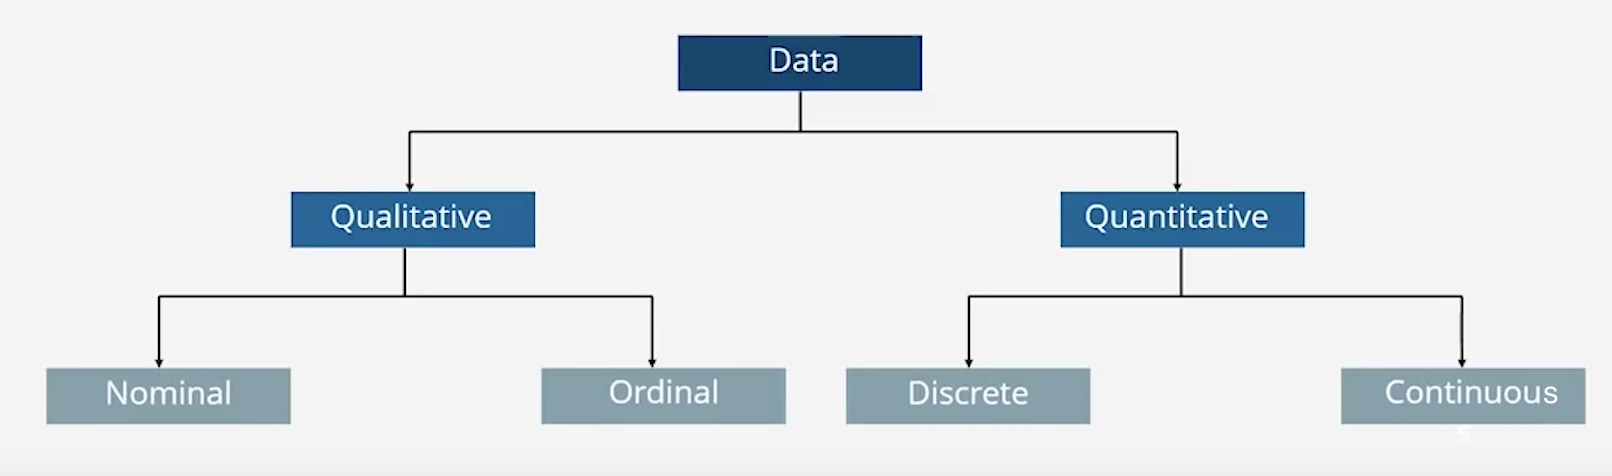

In [57]:
from IPython.display import Image
Image("images/types_of_data.png")

## Which is which?

- Rating (Good, Average, Bad)?
- Gender?
- Height of Individuals
- Number of Students

# 3. Statistics Review

* **Population**: A collection or set of Individuals or Objects or events whose properties are to be analyzed.
* **Sample**: A subset of a population is called a sample.

In [8]:
!ls images/

Class 4.ipynb     types_of_data.png


###  **Measures of Central Tendencies**
* Mean: Measure of average of all values in a sample.
* Median: Measure of the central value of the sample.
* Mode: The value most recurrent in the sample.

When should we use a median and when should we use a mean?

In [21]:
values = pd.Series(np.random.random(10)*100)
values

In [ ]:
print("Mean: \t", np.round(values.____(), 2))
print("Median: ", np.round(values.____(), 2))
print("Mode (Counts per value): \n", values.____())

### **Measures of Variability (spread)**

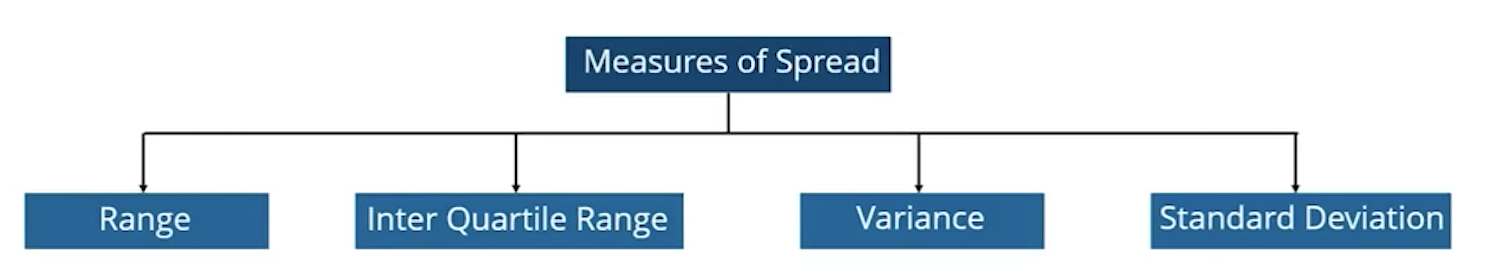

In [51]:
values = pd.Series([1, 2, 3, 4, 5, 6, 7])
Image("images/spread.png")

In [ ]:
### Range: Max(x) - Min(x)
print("Range: ", ______)

In [55]:
##  Quartiles tell us about the spread of a data set by breaking the data set into quarters, just like the median breaks it in half.

values.index = pd.qcut(values, q=2)
values

(0.999, 4.0]    1
(0.999, 4.0]    2
(0.999, 4.0]    3
(0.999, 4.0]    4
(4.0, 7.0]      5
(4.0, 7.0]      6
(4.0, 7.0]      7
dtype: int64

#### Variance: How much a random variable differs from its expected value

$$S^2 = \frac{\sum_1^{n=1}(x_i - \bar{x})^2}{n}$$

In [ ]:

variance = # TODO - Long Formula

print("My variance is (with long formula):", variance)


My standard deviation - measure of dispersion of a set of data from its mean (in terms of standard deviation)
$$ \sigma = \sqrt{S^2} $$

In [ ]:

standard_deviation = # TODO - Long Formula

print("My standard deviation is:", values.___()___) # Long Formula

print("My standard deviation is:", values.___()___) # Short Formula


## 4. Statistical Testing - Basic Exploratory Data Analysis (EDA)

In [315]:
## Hypothesis Testing is a core data analysis activity behind experimentation.
## The goal of hypothesis testing is to determine if, for instance, the two different
## conditions we have in an experiment have resulted in different impacts.

## We will use Scipy for this.
from scipy import stats

In [321]:
## When we do hypothesis testing, we actually have two statements of interest: 
## the first is our actual explanation, which we call the alternative hypothesis.
## Our actual testing method is to determine whether the null hypothesis is true or not.
## If we find that there is a difference between groups, then we can reject the null hypothesis and we accept our alternative.

df = pd.read_csv("data/adult.csv")

In [322]:
## Let's get some summary statistics...

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 32561 rows and 15 columns


In [323]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [327]:
rich = df[df['income'] == '>50K']
rest = df[df['income'] != '>50K']
#OR 
rest = df[~df.index.isin(rich.index)]

In [326]:
rich.shape, rest.shape

((7841, 15), (24720, 15))

In [336]:
rich

age         workclass  fnlwgt     education  education.num  \
7       74         State-gov   88638     Doctorate             16   
9       41           Private   70037  Some-college             10   
10      45           Private  172274     Doctorate             16   
11      38  Self-emp-not-inc  164526   Prof-school             15   
12      52           Private  129177     Bachelors             13   
...    ...               ...     ...           ...            ...   
32539   34           Private  160216     Bachelors             13   
32541   71                 ?  287372     Doctorate             16   
32547   39         Local-gov  111499    Assoc-acdm             12   
32555   53           Private  321865       Masters             14   
32558   40           Private  154374       HS-grad              9   

           marital.status         occupation    relationship   race     sex  \
7           Never-married     Prof-specialty  Other-relative  White  Female   
9           Never-married       Craft-repair       Unmarried  White    Male   
10               Divorced     Prof-specialty       Unmarried  Black  Female   
11          Never-married     Prof-specialty   Not-in-family  White    Male   
12                Widowed      Other-service   Not-in-family  White  Female   
...                   ...                ...             ...    ...     ...   
32539       Never-married    Exec-managerial   Not-in-family  White  Female   
32541  Married-civ-spouse                  ?         Husband  White    Male   
32547  Married-civ-spouse       Adm-clerical            Wife  White  Female   
32555  Married-civ-spouse    Exec-managerial         Husband  White    Male   
32558  Married-civ-spouse  Machine-op-inspct         Husband  White    Male   

       capital.gain  capital.loss  hours.per.week native.country income  
7                 0          3683              20  United-States   >50K  
9                 0          3004              60              ?   >50K  
10                0          3004              35  United-States   >50K  
11                0          2824              45  United-States   >50K  
12                0          2824              20  United-States   >50K  
...             ...           ...             ...            ...    ...  
32539             0             0              55  United-States   >50K  
32541             0             0              10  United-States   >50K  
32547             0             0              20  United-States   >50K  
32555             0             0              40  United-States   >50K  
32558             0             0              40  United-States   >50K  

[7841 rows x 15 columns]

In [344]:
## Are the rich and the rest different in age?
print('Education: ', rich['education.num'].mean(), rest['education.num'].mean())
print('Hours per week: ', rich['hours.per.week'].mean(), rest['hours.per.week'].mean())
print('Age: ', rich['age'].mean(), rest['age'].mean())

Education:  11.611656676444332 9.595064724919094
Hours per week:  45.473026399693914 38.840210355987054
Age:  44.24984058155847 36.78373786407767


In [331]:
# They look very different, but is it statistically significant?
# We can use the t-test for this, which allows us to form the alternative hypothesis 
# ("These are different") as well as the null hypothesis ("These are the same")
# and test the probability that the null hypothesis is true.

# We choose a significance level as a threshold for how much of a chance we're willing to accept. This
# signifiance level is typically called alpha.
# For this example, we'll choose 0.05 for our alpha, or 5%.
# Now this is a commonly used number if it's really quite arbitrary.

# The SciPy library contains a number of different statistical tests and forms a basis for hypothesis testing
# in python and we're going to use the ttest_ind() function which does an independent t-test
# (meaning the populations are related to one another).
# The result of the ttest_index() are the t-stat and a p-value.
# It's the p-value which is important in indicating what hypothesis is true.

from scipy.stats import ttest_ind

In [347]:
print(ttest_ind(rich['hours.per.week'], rest['hours.per.week']))
print(ttest_ind(rich['education.num'], rest['education.num']))
print(ttest_ind(rich['age'], rest['age']))
# this one is not discernible enough (Final weights of each categ).
print(ttest_ind(rich['fnlwgt'], rest['fnlwgt']))

Ttest_indResult(statistic=42.583873499437956, pvalue=0.0)
Ttest_indResult(statistic=64.18797223551665, pvalue=0.0)
Ttest_indResult(statistic=43.4362442404511, pvalue=0.0)
Ttest_indResult(statistic=-1.7075109328052853, pvalue=0.08773666108063947)


In [ ]:
# A value of 0.0 means we can reject the null hypothesis - both populations are different.

In [ ]:
## We can use confidence intervals and bayesian analysis to avoid p-hacking (finding significance at random)

In [ ]:
## How does p-hacking work?

In [355]:
df1 = pd.DataFrame([np.random.random(100) for x in range(100)])
df2 = pd.DataFrame([np.random.random(100) for x in range(100)])

In [358]:
# Are these two dataframes the same? For a given row in df1, is it the same row inside df2?
def test_columns(alpha=0.1):
    num_diff=0
    for col in df1.columns:
        teststat,pval = ttest_ind(df1[col],df2[col])
        if pval <= alpha:
            print(f"Col {col} is statistically significantly different at alpha={alpha}, pval={pval}")
            num_diff = num_diff+1
    print(f"Total number of different was {num_diff}, which is {float(num_diff)/len(df1.columns)*100}%")

In [360]:
# Note that we'll expect 5% of the rows to be significant...
test_columns(0.05)

Col 14 is statistically significantly different at alpha=0.05, pval=0.038084880242208054
Col 38 is statistically significantly different at alpha=0.05, pval=0.04009887624921131
Col 44 is statistically significantly different at alpha=0.05, pval=0.017870388316413598
Col 84 is statistically significantly different at alpha=0.05, pval=0.0005145248125605785
Col 99 is statistically significantly different at alpha=0.05, pval=0.01509085531799974
Total number of different was 5, which is 5.0%


In [ ]:
# Choosing alpha is the art within the science.

In [364]:
# Let's do a chi squared, non-normal distribution instead.
df2=pd.DataFrame([np.random.chisquare(df=1, size=100) for x in range(100)])

In [365]:
# they're mostly all statistically significant!
test_columns(0.05)

Col 0 is statistically significantly different at alpha=0.05, pval=0.0025449531741663024
Col 1 is statistically significantly different at alpha=0.05, pval=2.5071983150632318e-05
Col 2 is statistically significantly different at alpha=0.05, pval=0.0046594612659829684
Col 3 is statistically significantly different at alpha=0.05, pval=2.7550511597050187e-05
Col 4 is statistically significantly different at alpha=0.05, pval=0.000546886399847807
Col 5 is statistically significantly different at alpha=0.05, pval=0.01465827924575842
Col 6 is statistically significantly different at alpha=0.05, pval=0.0003256844226505671
Col 7 is statistically significantly different at alpha=0.05, pval=6.374721594611618e-05
Col 8 is statistically significantly different at alpha=0.05, pval=1.0588860407657135e-05
Col 9 is statistically significantly different at alpha=0.05, pval=1.8836210897031166e-05
Col 10 is statistically significantly different at alpha=0.05, pval=0.00021795729461399397
Col 11 is statisti